In [1]:
import glob
import json
import sys

# change this to your virtualenv path
sys.path.append('../../venv/gs-test/lib/python3.6/site-packages')

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
metricProps = {
    'messageID': '',
    'originatorHostID': '',
    'totalNanoTime': '',
    'lastDeliveryHop': '',
    'relativeMessageRedundancy': ''
}

class Metric(object):
    def __init__(self, props = metricProps):        
        self.messageID = props['messageID']
        self.originatorHostID = props['originatorHostID']
        self.totalNanoTime = int(props['totalNanoTime'])
        self.lastDeliveryHop = float(props['lastDeliveryHop'])
        self.relativeMessageRedundancy = float(props['relativeMessageRedundancy'])

In [4]:
def computeMetrics(algorithm = 'gossip', filename = None):
    metrics = []
    nanoTimes = []
    ldh = []
    rmr = []
    
    if filename == None:
        pubsubAnalysisFiles = glob.glob('*.json')
    else:
        pubsubAnalysisFiles = glob.glob('{}'.format(filename))
        


    for pubsubAnalysisFile in pubsubAnalysisFiles:
        tmpMetrics = []

        with open(pubsubAnalysisFile) as json_file:
            data = json.load(json_file)
            for metric in data:
                m = Metric(metric)
                tmpMetrics.append(m)
                
                nanoTimes.append(m.totalNanoTime)
                ldh.append(m.lastDeliveryHop)
                rmr.append(m.relativeMessageRedundancy)

        metrics.append(tmpMetrics)
            
    _ = plt.hist(nanoTimes, bins='auto', histtype='step')
    plt.title("{} - Total Nano Time Histogram".format(algorithm))
    plt.xlabel('Total Nano Time')
    plt.ylabel('Occurrence')

    plt.show()
    
    _ = plt.hist(ldh, bins='auto', histtype='step')
    plt.title("{} - Last Delivery Hop Histogram".format(algorithm))
    plt.xlabel('Last Delivery Hop')
    plt.ylabel('Occurrence')

    plt.show()
    
    _ = plt.hist(rmr, bins='auto', histtype='step')
    plt.title("{} - Relative Message Redundancy Histogram".format(algorithm))
    plt.xlabel('Relative Message Redundancy')
    plt.ylabel('Occurrence')

    plt.show()
    
    nanoMean = np.mean(nanoTimes)
    nanoMedian = np.median(nanoTimes)
    nanoStd = np.std(nanoTimes)

    ldhMean = np.mean(ldh)
    ldhMedian = np.median(ldh)
    ldhStd = np.std(ldh)

    rmrMean = np.mean(rmr)
    rmrMedian = np.median(rmr)
    rmrStd = np.std(rmr)

    print('Messages published: {}'.format(len(nanoTimes)))
    print('Total Nano Times - mean: {}, median: {}, std: {}'.format(nanoMean, nanoMedian, nanoStd))
    print('Last Delivery Hop - mean: {}, median: {}, std: {}'.format(ldhMean, ldhMedian, ldhStd))
    print('Relative Message Redundancy - mean: {}, median: {}, std: {}'.format(rmrMean, rmrMedian, rmrStd))

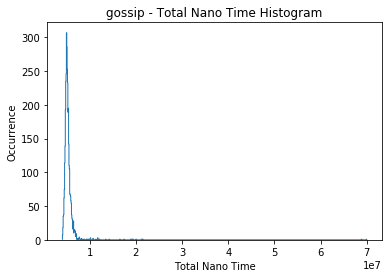

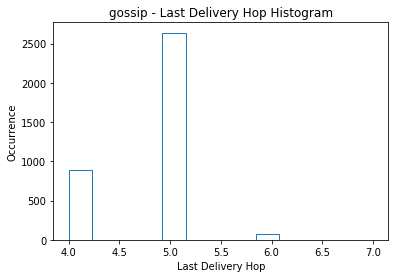

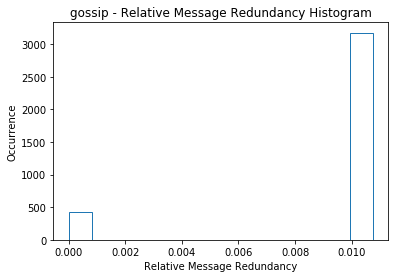

Messages published: 3600
Total Nano Times - mean: 5319737.265833333, median: 5119582.0, std: 1829679.4700306172
Last Delivery Hop - mean: 4.773055555555556, median: 5.0, std: 0.4653512379819764
Relative Message Redundancy - mean: 0.009483382680555553, median: 0.010752678, std: 0.0034692857987790853


In [5]:
# for individual plotting
computeMetrics('gossip', 'analysis_21b.1.json')



file:analysis_loss_1.0.json
relativeMessageRedundancy key error, skipping analysis


file:analysis_loss_0.01.json


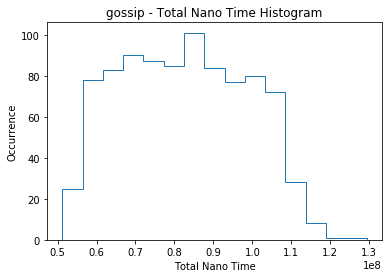

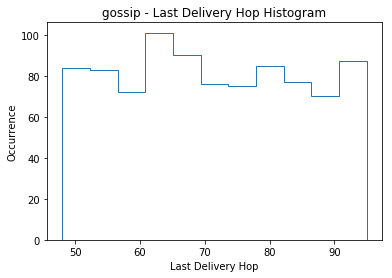

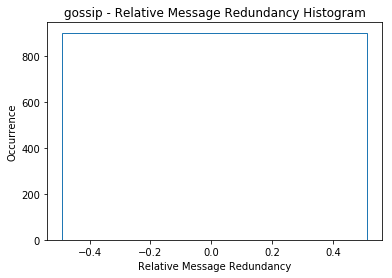

Messages published: 900
Total Nano Times - mean: 82506287.41888888, median: 82546483.5, std: 16005290.003619183
Last Delivery Hop - mean: 71.18777777777778, median: 71.0, std: 13.538474620936007
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_3b.1.json


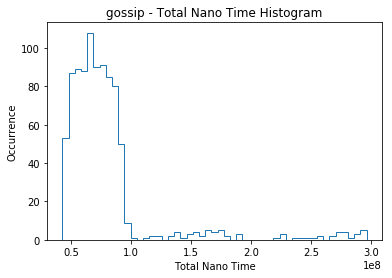

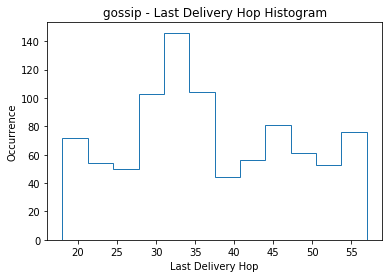

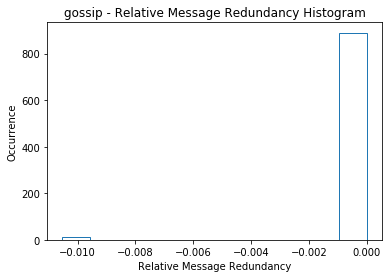

Messages published: 900
Total Nano Times - mean: 79004887.8611111, median: 69893786.0, std: 41433938.49933281
Last Delivery Hop - mean: 36.80555555555556, median: 35.0, std: 10.705915925434365
Relative Message Redundancy - mean: -0.00011596999444444452, median: 1e-06, std: 0.0011034927206056548


file:analysis_latency_500ms.json
relativeMessageRedundancy key error, skipping analysis


file:analysis_barabasi-albert_test1.json


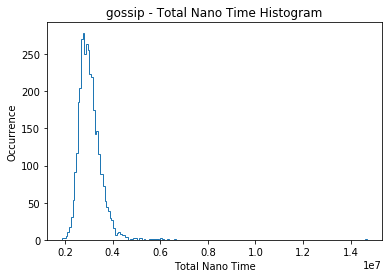

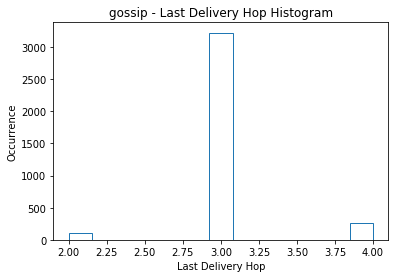

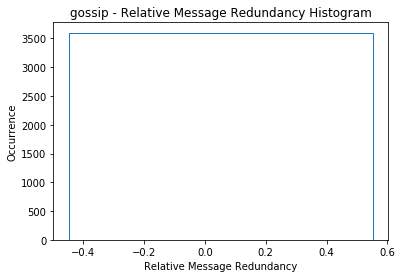

Messages published: 3600
Total Nano Times - mean: 3033563.7525, median: 2962718.5, std: 501929.2250796306
Last Delivery Hop - mean: 3.0452777777777778, median: 3.0, std: 0.31955686427641145
Relative Message Redundancy - mean: 0.05263161699999999, median: 0.052631617, std: 6.938893903907228e-18


file:analysis_barabasi-albert_test2.json


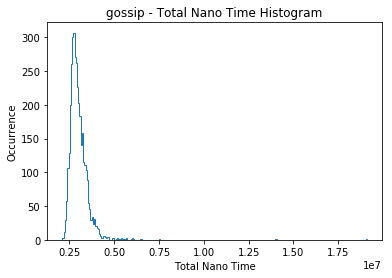

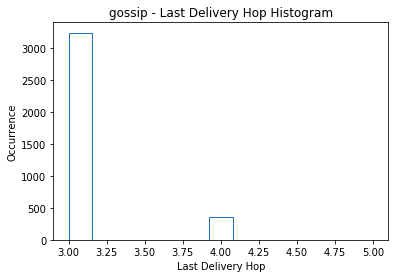

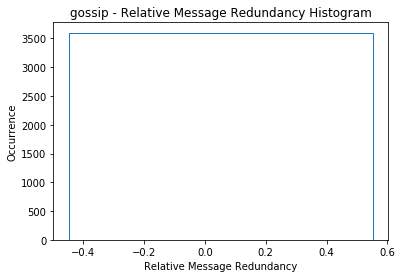

Messages published: 3600
Total Nano Times - mean: 2983551.697222222, median: 2889902.5, std: 555112.6839972258
Last Delivery Hop - mean: 3.098611111111111, median: 3.0, std: 0.2999967849621964
Relative Message Redundancy - mean: 0.05263161699999999, median: 0.052631617, std: 6.938893903907228e-18


file:analysis_21a.2.json


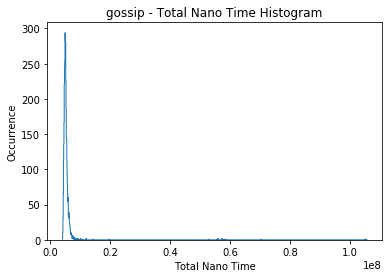

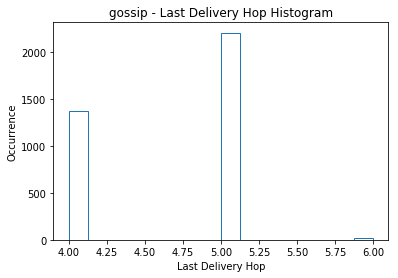

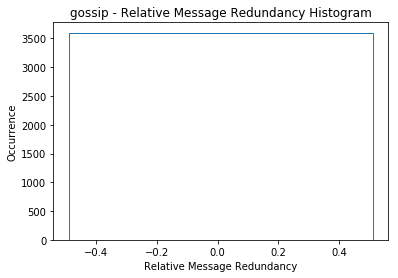

Messages published: 3600
Total Nano Times - mean: 5386783.069444444, median: 5036576.5, std: 3816145.850530419
Last Delivery Hop - mean: 4.625, median: 5.0, std: 0.49602587298110434
Relative Message Redundancy - mean: 0.010638355999999996, median: 0.010638356, std: 3.469446951953614e-18


file:analysis_1c.2.json


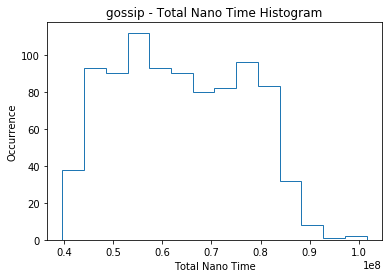

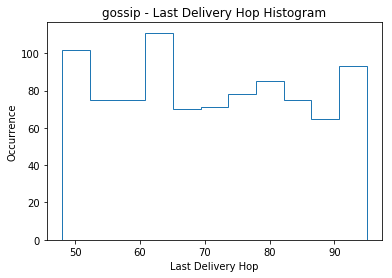

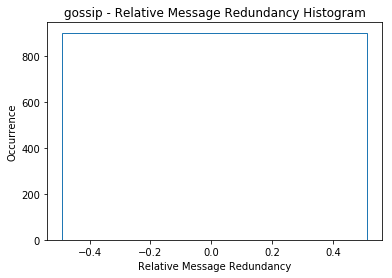

Messages published: 900
Total Nano Times - mean: 63775765.93888889, median: 63109770.0, std: 12869559.256795848
Last Delivery Hop - mean: 70.89666666666666, median: 70.0, std: 13.87473283026059
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis.json


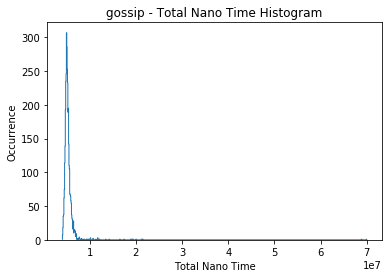

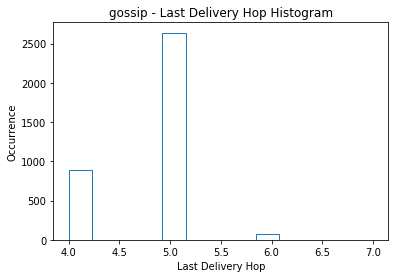

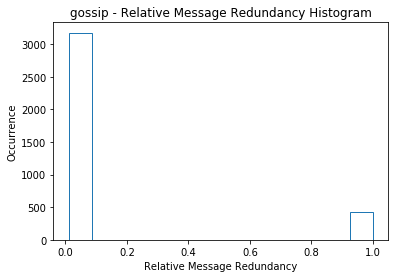

Messages published: 3600
Total Nano Times - mean: 5319737.265833333, median: 5119582.0, std: 1829679.4700306172
Last Delivery Hop - mean: 4.773055555555556, median: 5.0, std: 0.4653512379819764
Relative Message Redundancy - mean: 0.1275388201805555, median: 0.010752678, std: 0.31920428473535395


file:analysis_4c.3.json


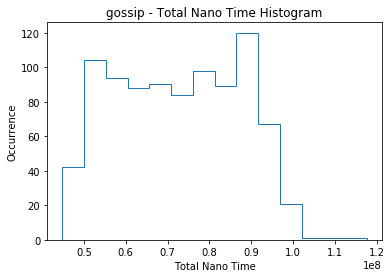

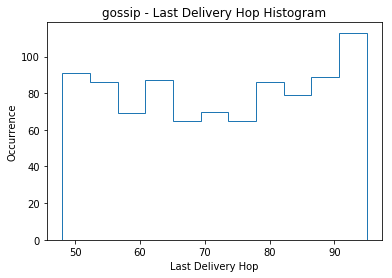

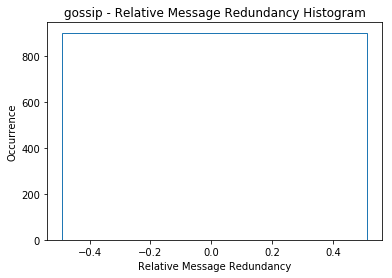

Messages published: 900
Total Nano Times - mean: 72597734.26111111, median: 73059924.5, std: 14705941.189047202
Last Delivery Hop - mean: 72.23555555555555, median: 73.0, std: 14.279435960780267
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_latency_150ms.json


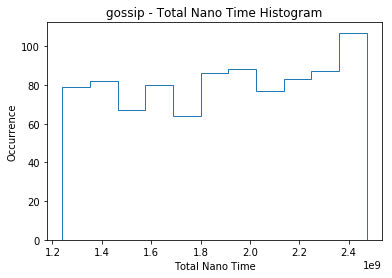

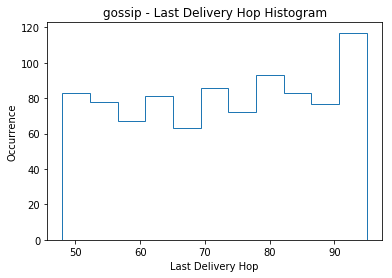

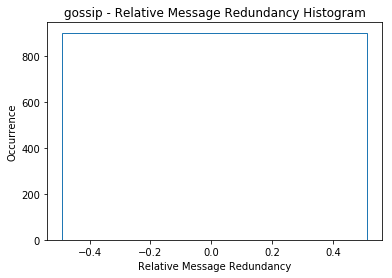

Messages published: 900
Total Nano Times - mean: 1886266839.0866666, median: 1895940455.0, std: 364721921.21278274
Last Delivery Hop - mean: 72.67888888888889, median: 73.0, std: 14.044223758814665
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_4a.1.json


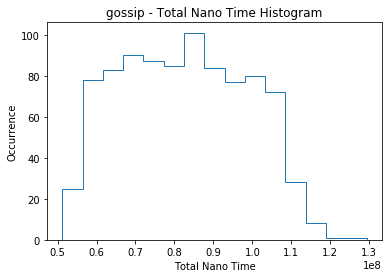

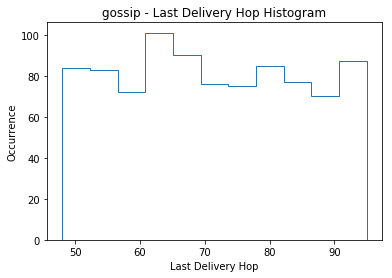

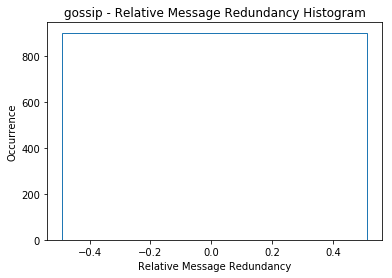

Messages published: 900
Total Nano Times - mean: 82506287.41888888, median: 82546483.5, std: 16005290.003619181
Last Delivery Hop - mean: 71.18777777777778, median: 71.0, std: 13.538474620936007
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_21b.2.json


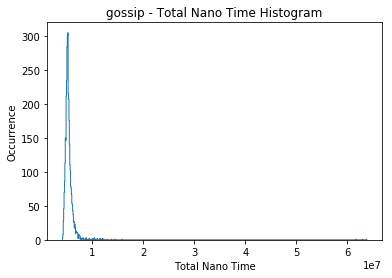

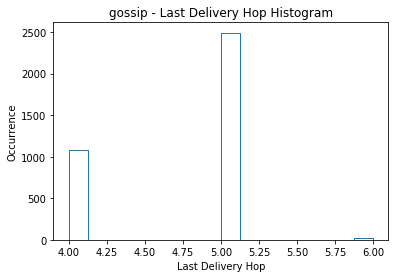

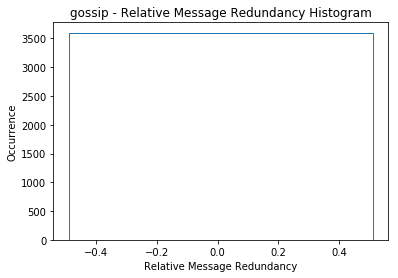

Messages published: 3600
Total Nano Times - mean: 5380729.8325, median: 5180974.5, std: 1840404.2220616569
Last Delivery Hop - mean: 4.706388888888889, median: 5.0, std: 0.47100750629650734
Relative Message Redundancy - mean: 0.010638355999999996, median: 0.010638356, std: 3.469446951953614e-18


file:analysis_21b.3.json


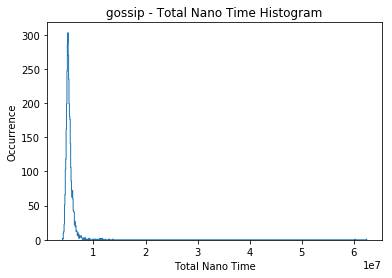

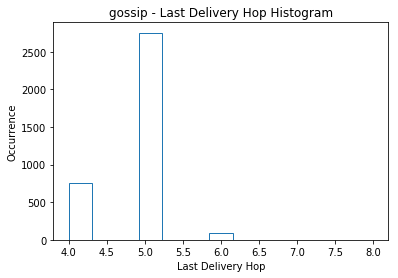

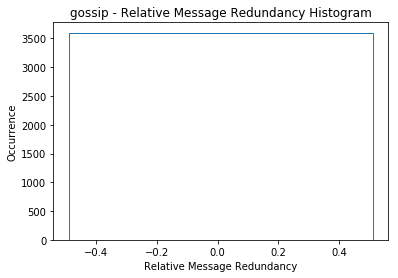

Messages published: 3600
Total Nano Times - mean: 5387165.164722222, median: 5199297.0, std: 1528710.2777051693
Last Delivery Hop - mean: 4.813055555555556, median: 5.0, std: 0.45005752375819474
Relative Message Redundancy - mean: 0.010638355999999996, median: 0.010638356, std: 3.469446951953614e-18


file:analysis_2b.2.json


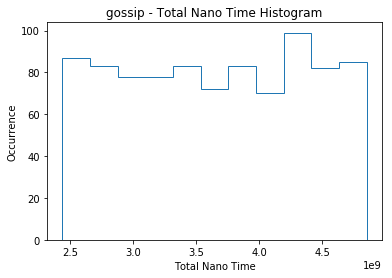

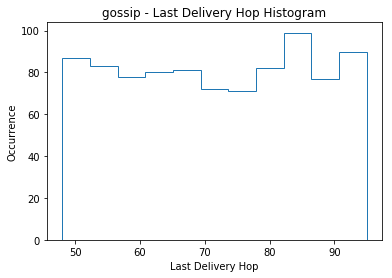

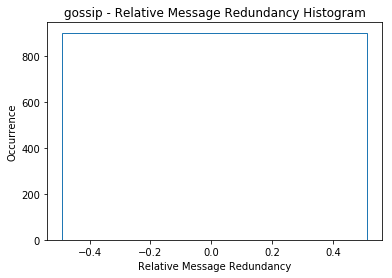

Messages published: 900
Total Nano Times - mean: 3656873429.1811113, median: 3629284407.0, std: 706794859.955175
Last Delivery Hop - mean: 71.73444444444445, median: 71.0, std: 13.869051566636585
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_4c.1.json


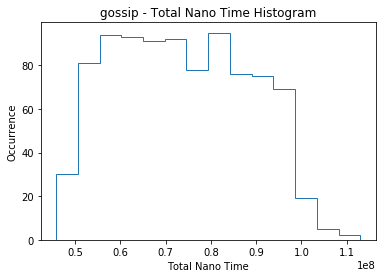

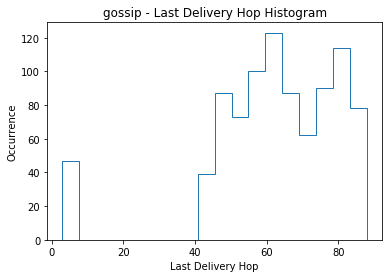

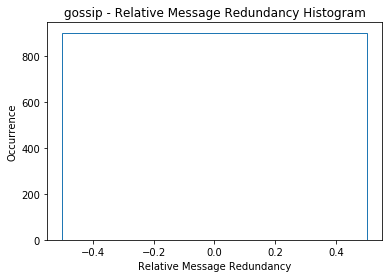

Messages published: 900
Total Nano Times - mean: 73586611.29777777, median: 73228146.0, std: 14594816.567936888
Last Delivery Hop - mean: 62.58444444444444, median: 64.0, std: 18.34674001384994
Relative Message Redundancy - mean: 1.0000000000000002e-06, median: 1e-06, std: 2.117582368135751e-22


file:analysis_4a.2.json


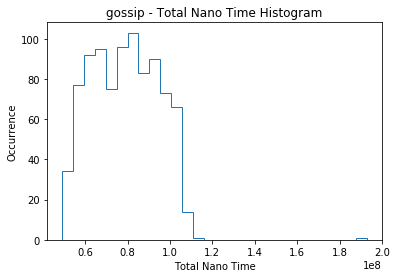

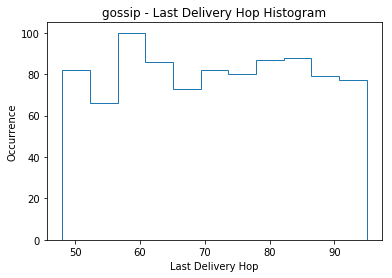

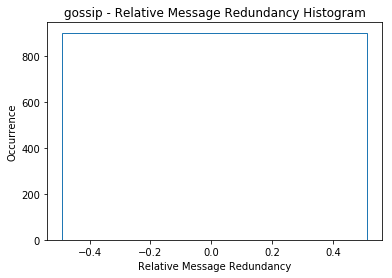

Messages published: 900
Total Nano Times - mean: 78825346.78888889, median: 79090660.5, std: 15635007.358657705
Last Delivery Hop - mean: 71.50888888888889, median: 72.0, std: 13.43357852914723
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_1a.1.json


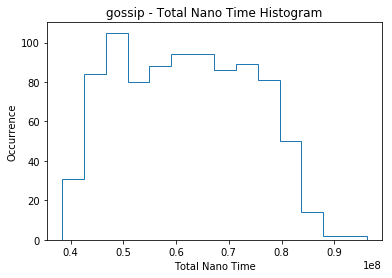

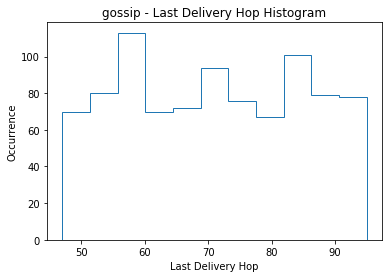

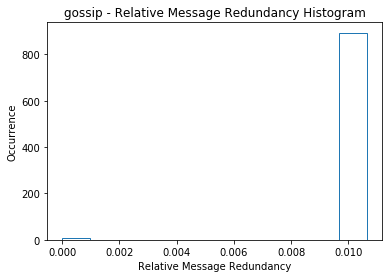

Messages published: 900
Total Nano Times - mean: 61908172.54, median: 61664560.5, std: 12237787.89375768
Last Delivery Hop - mean: 70.98444444444445, median: 71.0, std: 13.717862735305795
Relative Message Redundancy - mean: 0.010555621008888889, median: 0.010638356, std: 0.0009344712276745437


file:analysis_1b.1.json


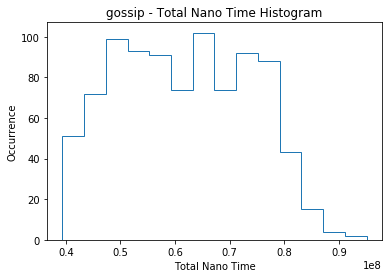

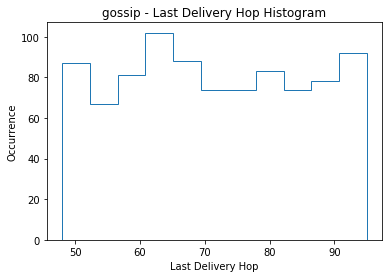

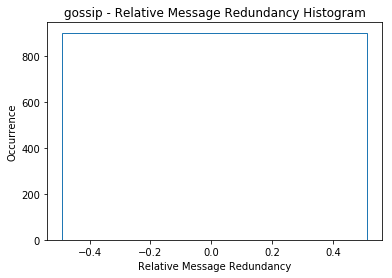

Messages published: 900
Total Nano Times - mean: 61727026.225555554, median: 61196227.5, std: 12082744.415782975
Last Delivery Hop - mean: 71.48777777777778, median: 71.0, std: 13.675804488038784
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_5a.1.json


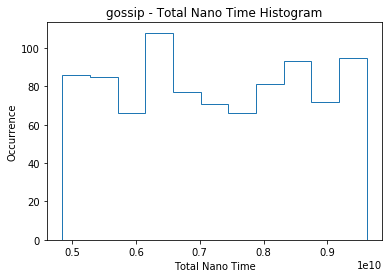

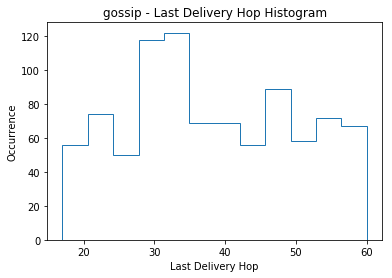

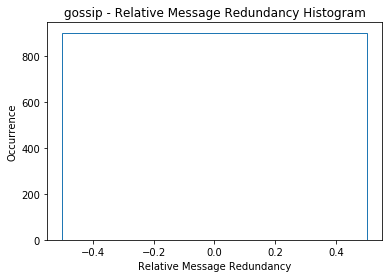

Messages published: 900
Total Nano Times - mean: 7233386965.234445, median: 7177319706.5, std: 1406253206.0364275
Last Delivery Hop - mean: 38.172222222222224, median: 36.0, std: 11.817797574259462
Relative Message Redundancy - mean: 1.0000000000000002e-06, median: 1e-06, std: 2.117582368135751e-22


file:analysis_4b.2.json


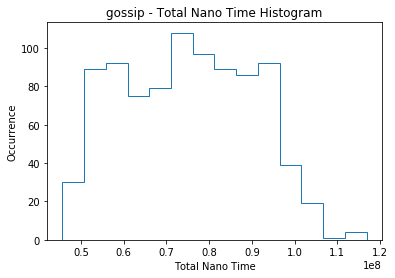

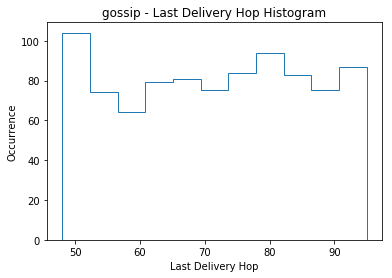

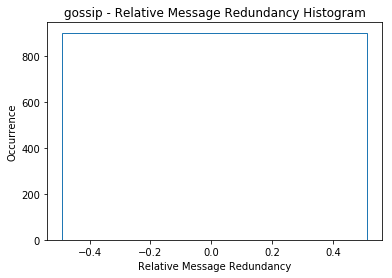

Messages published: 900
Total Nano Times - mean: 74909276.31, median: 75006534.5, std: 15014913.602127025
Last Delivery Hop - mean: 71.56888888888889, median: 72.0, std: 13.932166174755011
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_2c.2.json


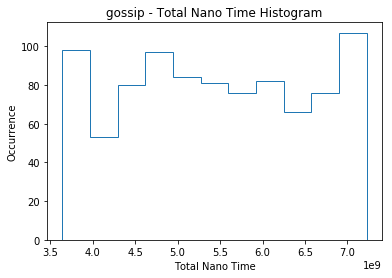

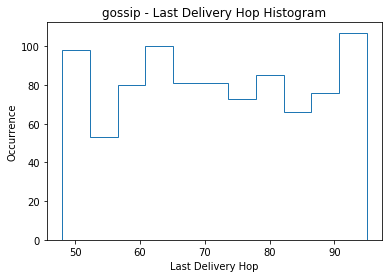

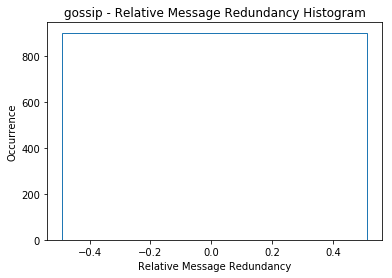

Messages published: 900
Total Nano Times - mean: 5451967255.864445, median: 5396098225.5, std: 1052891429.7395818
Last Delivery Hop - mean: 71.74777777777778, median: 71.0, std: 13.856075504812383
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_3c.3.json


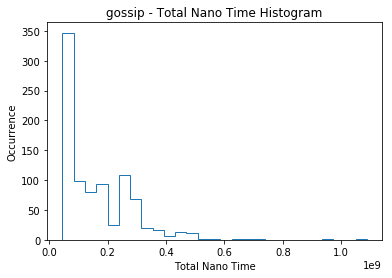

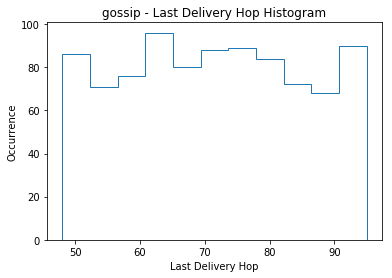

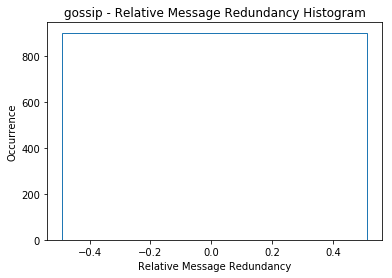

Messages published: 900
Total Nano Times - mean: 164326356.3011111, median: 125871544.0, std: 122063632.23725285
Last Delivery Hop - mean: 71.46222222222222, median: 71.0, std: 13.42641325296917
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_2b.1.json


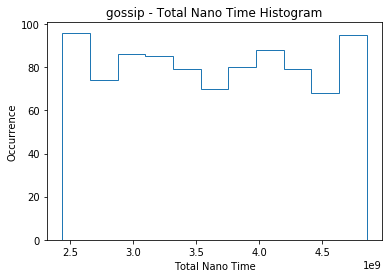

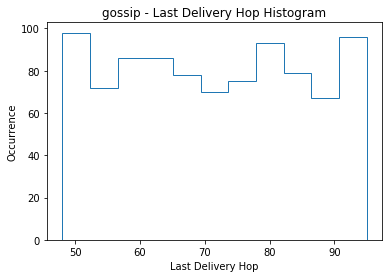

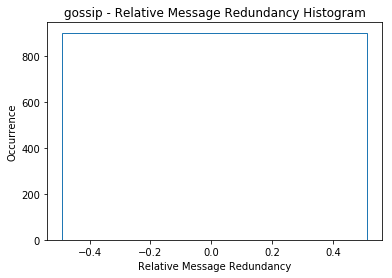

Messages published: 900
Total Nano Times - mean: 3635107188.6277776, median: 3615921658.5, std: 710421635.6562401
Last Delivery Hop - mean: 71.32666666666667, median: 71.0, std: 13.944810265232487
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_21b.1.json


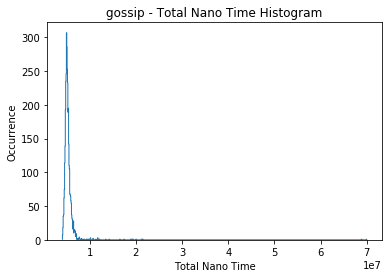

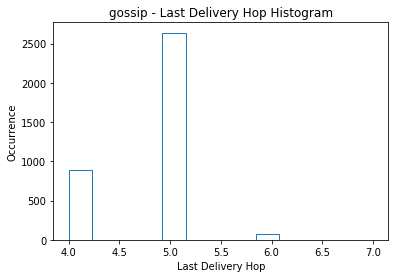

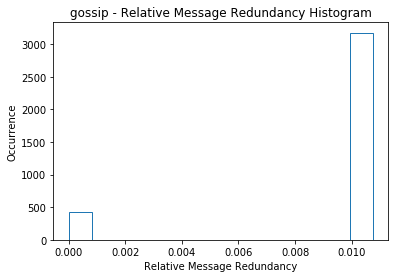

Messages published: 3600
Total Nano Times - mean: 5319737.265833333, median: 5119582.0, std: 1829679.4700306172
Last Delivery Hop - mean: 4.773055555555556, median: 5.0, std: 0.4653512379819764
Relative Message Redundancy - mean: 0.009483382680555553, median: 0.010752678, std: 0.0034692857987790853


file:analysis_1a.2.json


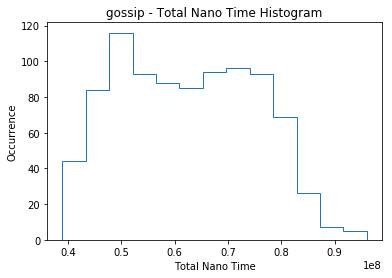

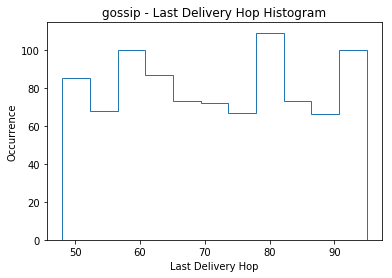

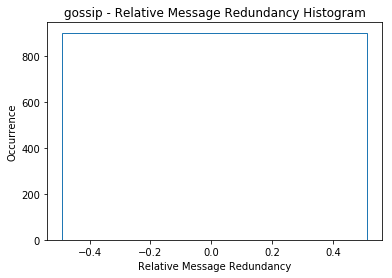

Messages published: 900
Total Nano Times - mean: 62525036.08888889, median: 62425248.5, std: 12645922.6365807
Last Delivery Hop - mean: 71.67222222222222, median: 71.0, std: 13.842860396269888
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_3b.2.json


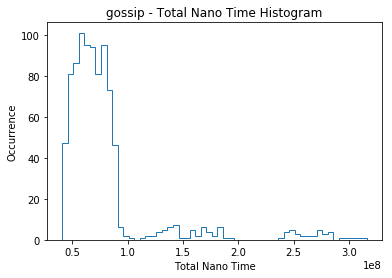

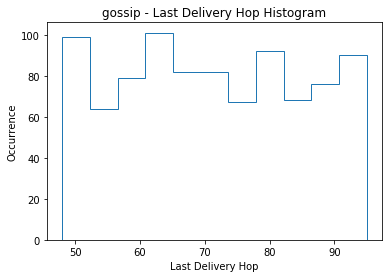

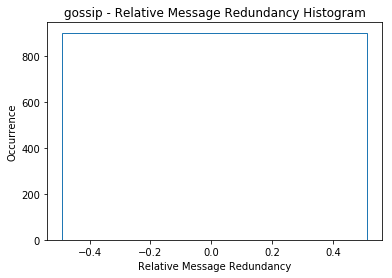

Messages published: 900
Total Nano Times - mean: 79466539.79, median: 67560419.0, std: 46139450.32101979
Last Delivery Hop - mean: 71.18444444444444, median: 71.0, std: 13.781847248473149
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_1b.3.json


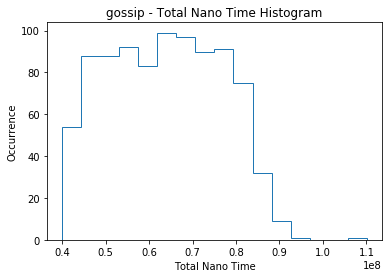

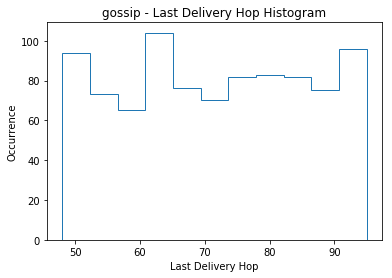

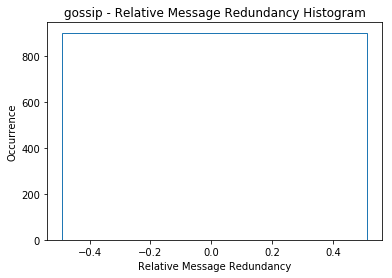

Messages published: 900
Total Nano Times - mean: 63803565.50333333, median: 64110948.5, std: 12752363.166664686
Last Delivery Hop - mean: 71.67, median: 72.0, std: 13.90079893787084
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_2a.2.json


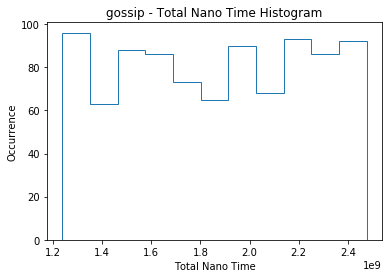

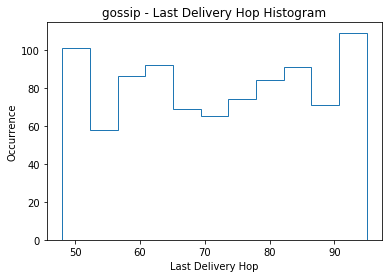

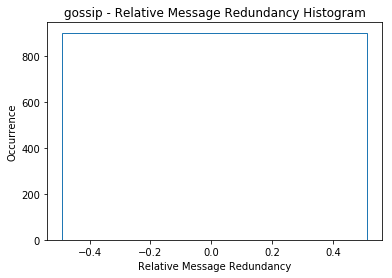

Messages published: 900
Total Nano Times - mean: 1866909724.1677778, median: 1867290048.0, std: 367551165.6120181
Last Delivery Hop - mean: 71.92666666666666, median: 72.0, std: 14.160553975353112
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_4a.3.json


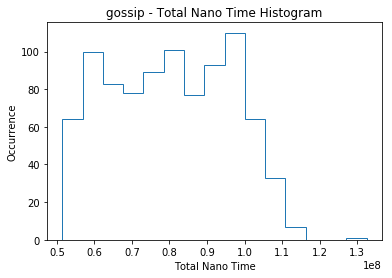

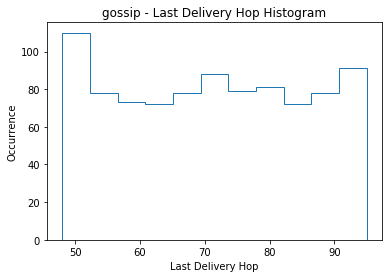

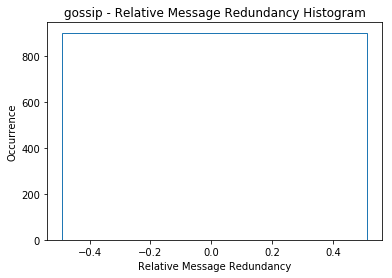

Messages published: 900
Total Nano Times - mean: 80256317.37, median: 80482965.5, std: 16082018.84686806
Last Delivery Hop - mean: 71.05666666666667, median: 71.0, std: 14.093659330824387
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_2a.3.json


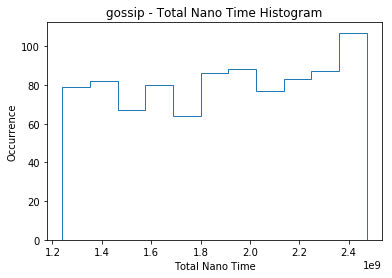

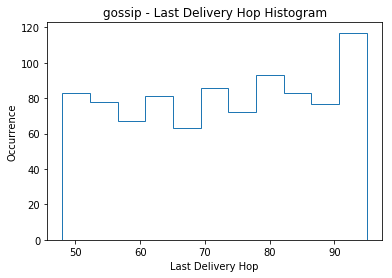

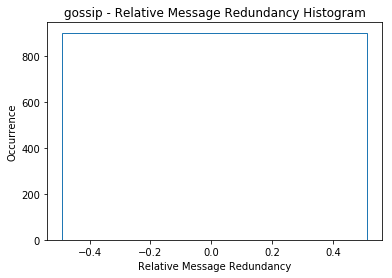

Messages published: 900
Total Nano Times - mean: 1886266839.0866666, median: 1895940455.0, std: 364721921.21278274
Last Delivery Hop - mean: 72.67888888888889, median: 73.0, std: 14.044223758814665
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_latency_100ms.json


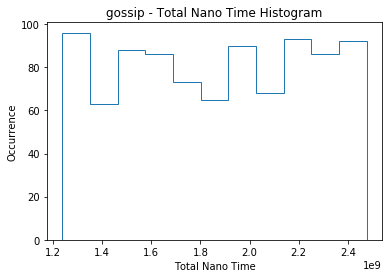

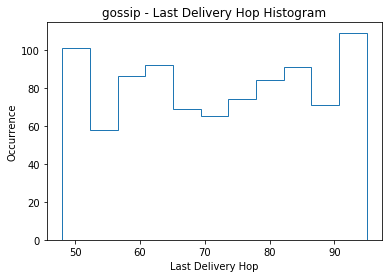

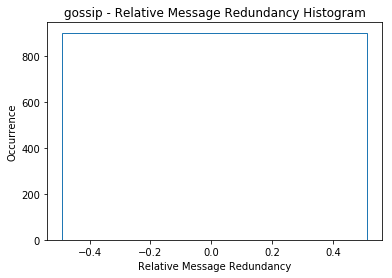

Messages published: 900
Total Nano Times - mean: 1866909724.1677778, median: 1867290048.0, std: 367551165.6120181
Last Delivery Hop - mean: 71.92666666666666, median: 72.0, std: 14.160553975353114
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_4b.3.json


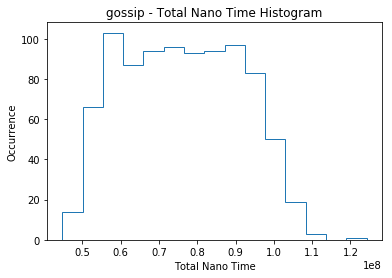

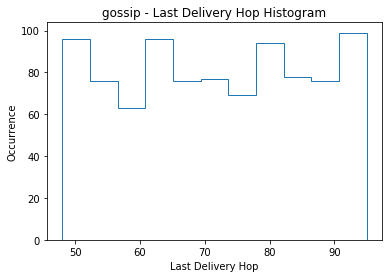

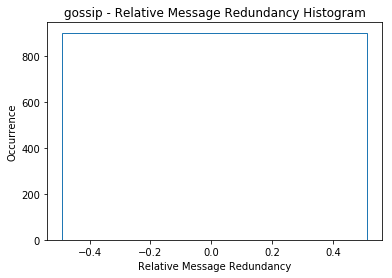

Messages published: 900
Total Nano Times - mean: 76249702.15888889, median: 75959984.5, std: 15227664.804295776
Last Delivery Hop - mean: 71.79666666666667, median: 72.0, std: 13.957227916427785
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_3c.2.json


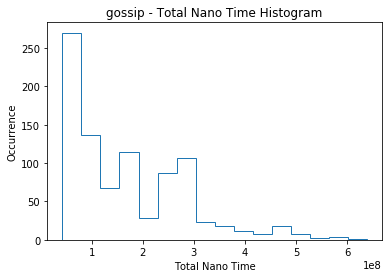

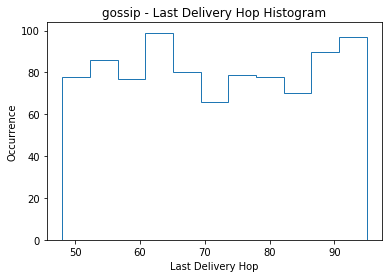

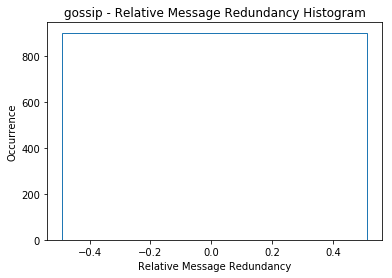

Messages published: 900
Total Nano Times - mean: 169444755.66222224, median: 145275525.0, std: 113935739.7251845
Last Delivery Hop - mean: 71.78111111111112, median: 71.0, std: 13.859288056465916
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_connected.json


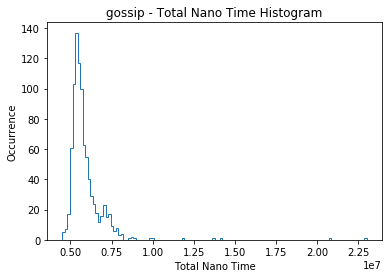

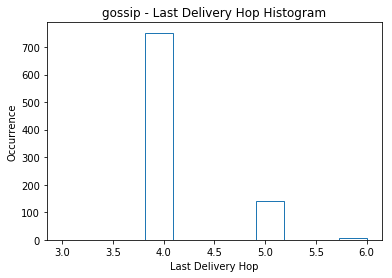

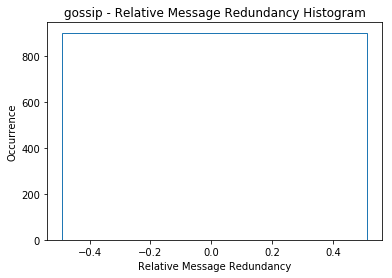

Messages published: 900
Total Nano Times - mean: 5868430.913333333, median: 5593991.0, std: 1147487.212018777
Last Delivery Hop - mean: 4.168888888888889, median: 4.0, std: 0.3948683168529997
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_1a.3.json


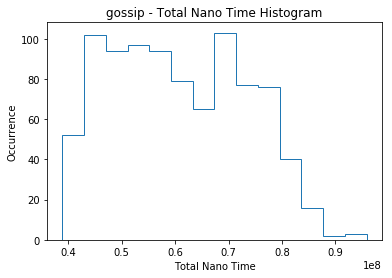

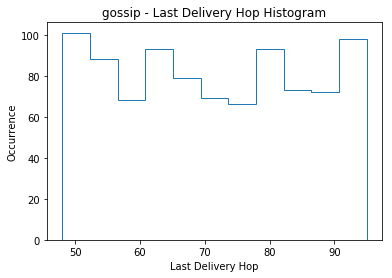

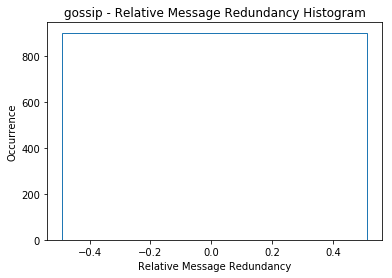

Messages published: 900
Total Nano Times - mean: 60739655.957777776, median: 59990768.5, std: 12406889.909495063
Last Delivery Hop - mean: 71.09444444444445, median: 71.0, std: 14.155994891141516
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_latency_300ms.json


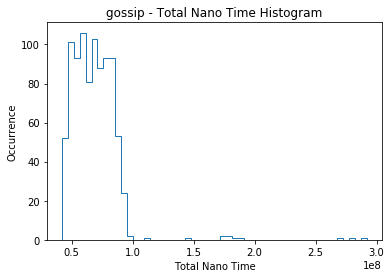

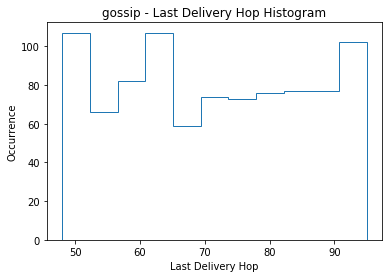

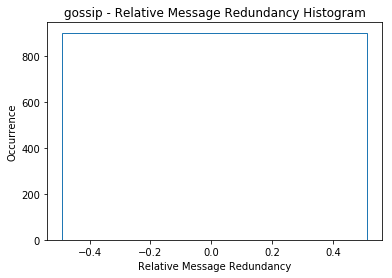

Messages published: 900
Total Nano Times - mean: 68447204.90666667, median: 66971230.5, std: 20567071.01289919
Last Delivery Hop - mean: 71.27888888888889, median: 71.0, std: 14.223650058534705
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_latency_1000ms.json


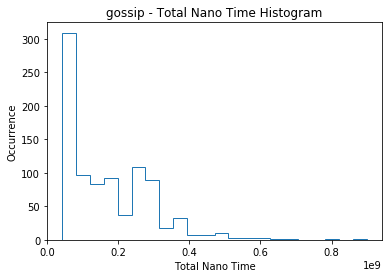

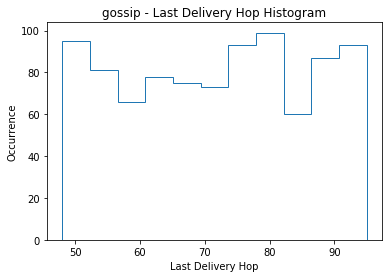

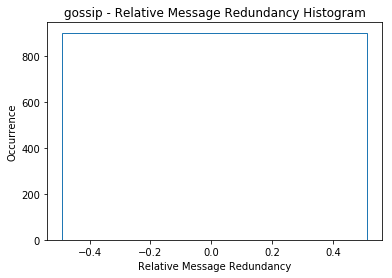

Messages published: 900
Total Nano Times - mean: 172068949.63777778, median: 148648720.5, std: 119393909.73024054
Last Delivery Hop - mean: 71.78111111111112, median: 73.0, std: 13.912020337698735
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_21c.1.json


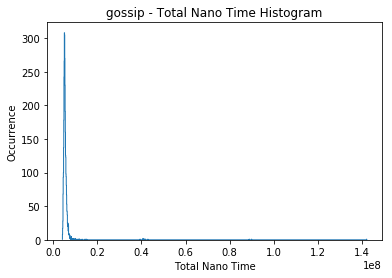

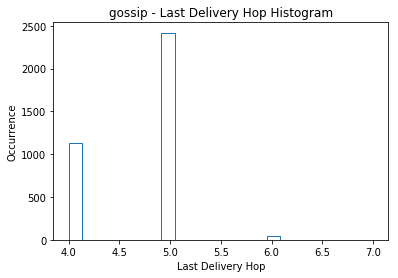

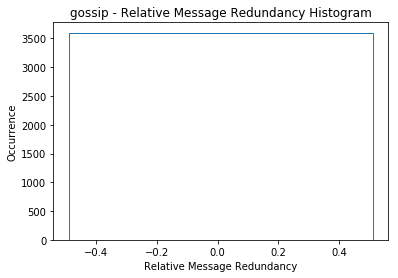

Messages published: 3600
Total Nano Times - mean: 5558207.845555556, median: 5223374.0, std: 3634333.091374115
Last Delivery Hop - mean: 4.6994444444444445, median: 5.0, std: 0.488421177789805
Relative Message Redundancy - mean: 0.010638355999999996, median: 0.010638356, std: 3.469446951953614e-18


file:analysis_21a.1.json


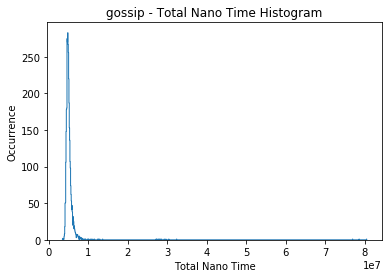

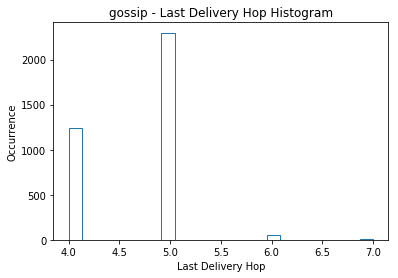

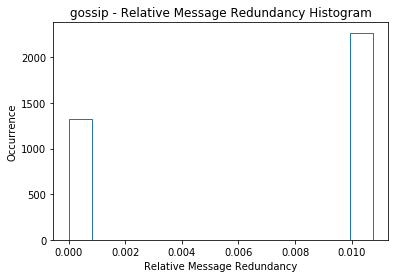

Messages published: 3600
Total Nano Times - mean: 5191305.700833334, median: 4914223.0, std: 2600238.2670865944
Last Delivery Hop - mean: 4.6738888888888885, median: 5.0, std: 0.5085779617815508
Relative Message Redundancy - mean: 0.0067835168716666675, median: 0.010752678, std: 0.00518853566233136


file:analysis_3a.1.json


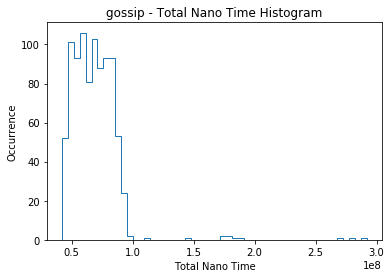

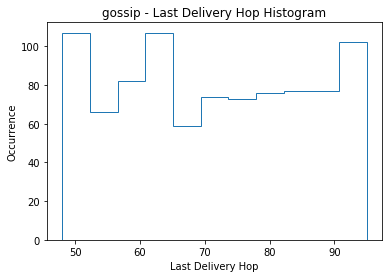

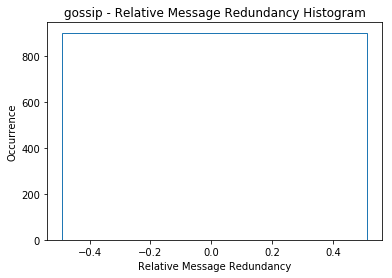

Messages published: 900
Total Nano Times - mean: 68447204.90666667, median: 66971230.5, std: 20567071.012899186
Last Delivery Hop - mean: 71.27888888888889, median: 71.0, std: 14.223650058534705
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_3c.1.json


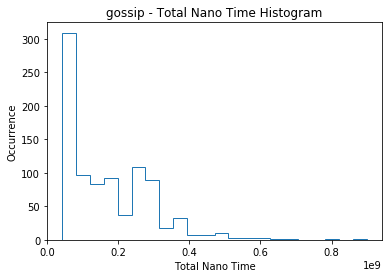

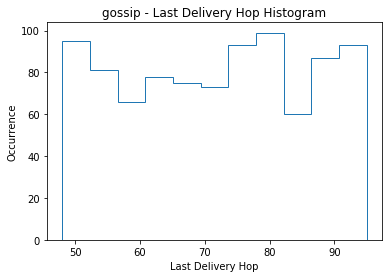

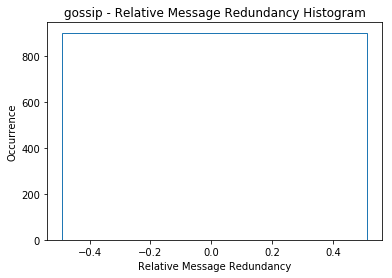

Messages published: 900
Total Nano Times - mean: 172068949.63777778, median: 148648720.5, std: 119393909.73024054
Last Delivery Hop - mean: 71.78111111111112, median: 73.0, std: 13.912020337698735
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_1c.1.json


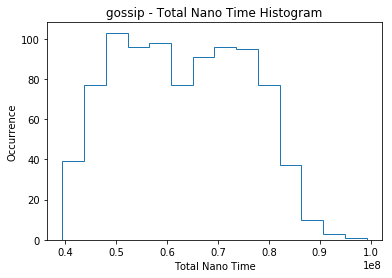

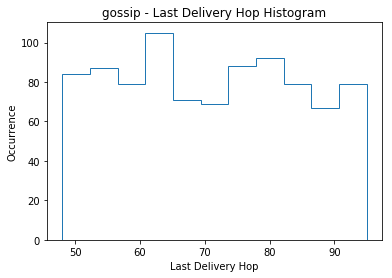

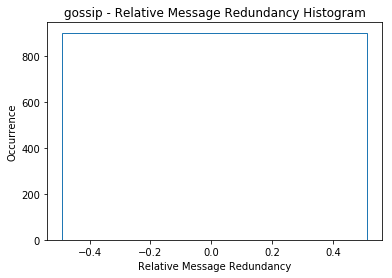

Messages published: 900
Total Nano Times - mean: 63132087.79666667, median: 62979155.5, std: 12400599.393646756
Last Delivery Hop - mean: 70.92333333333333, median: 71.0, std: 13.502991849545378
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_.json


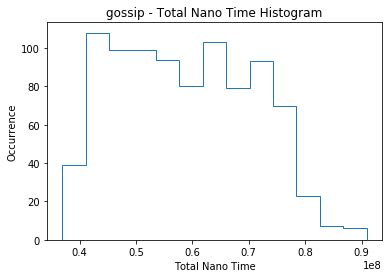

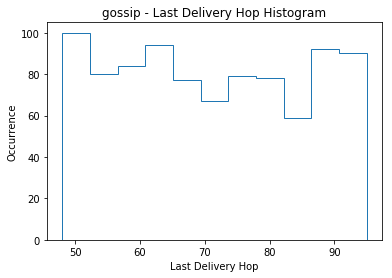

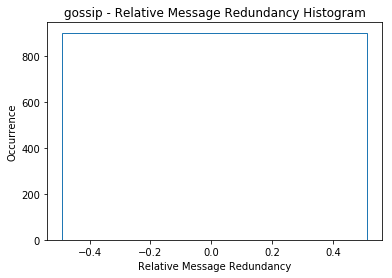

Messages published: 900
Total Nano Times - mean: 58886465.72, median: 58448364.0, std: 11987005.010610085
Last Delivery Hop - mean: 70.98222222222222, median: 71.0, std: 14.0100644599816
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_control.json


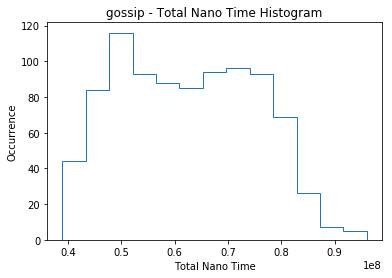

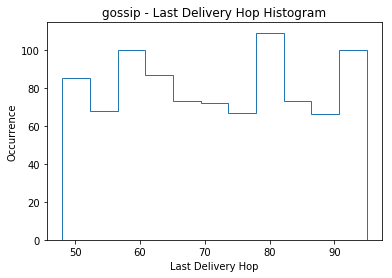

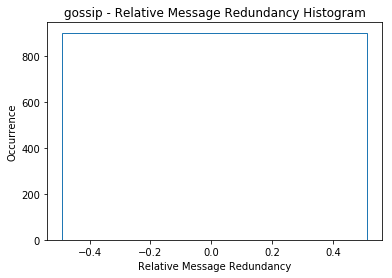

Messages published: 900
Total Nano Times - mean: 62525036.08888889, median: 62425248.5, std: 12645922.636580698
Last Delivery Hop - mean: 71.67222222222222, median: 71.0, std: 13.842860396269886
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_latency_50ms.json
relativeMessageRedundancy key error, skipping analysis


file:analysis_loss_0.1.json


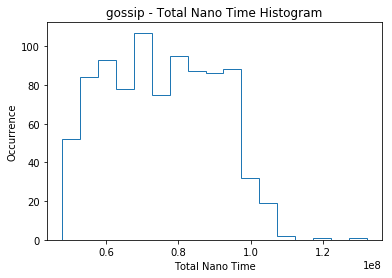

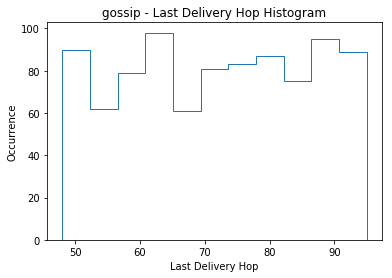

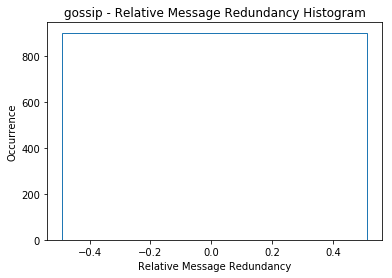

Messages published: 900
Total Nano Times - mean: 75423898.66333333, median: 75638990.0, std: 14899471.052595941
Last Delivery Hop - mean: 72.00333333333333, median: 72.0, std: 13.76367965980674
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_1b.2.json


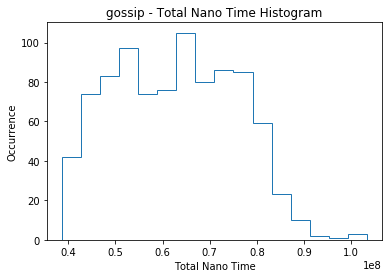

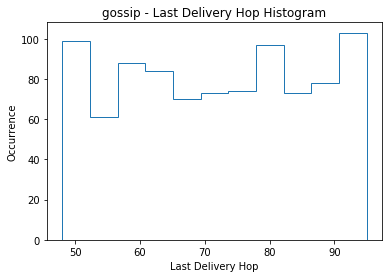

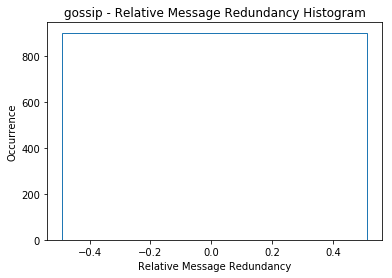

Messages published: 900
Total Nano Times - mean: 62664822.00333333, median: 63110144.5, std: 12795116.477150196
Last Delivery Hop - mean: 71.75666666666666, median: 72.0, std: 14.087966101921484
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_3a.2.json


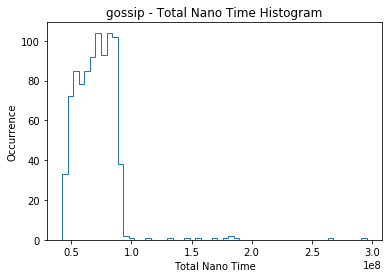

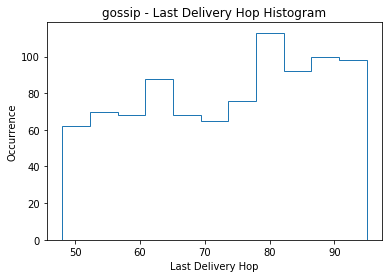

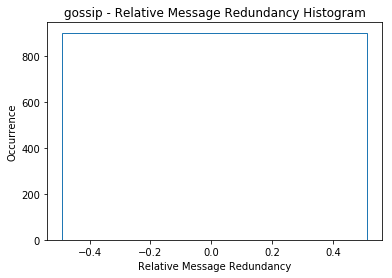

Messages published: 900
Total Nano Times - mean: 70671848.62222221, median: 70494494.0, std: 18881323.492953796
Last Delivery Hop - mean: 73.53777777777778, median: 75.0, std: 13.575701968981836
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_3a.3.json


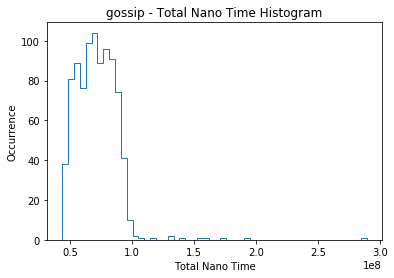

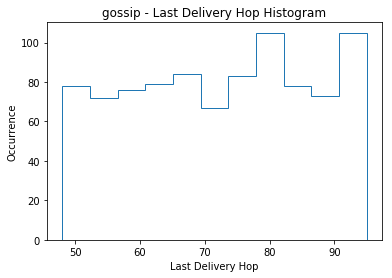

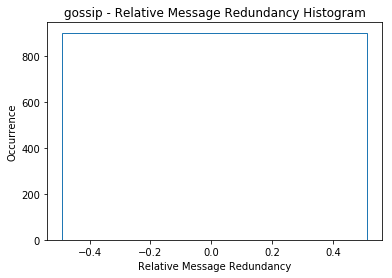

Messages published: 900
Total Nano Times - mean: 70993335.60333334, median: 70237853.5, std: 17280809.003265094
Last Delivery Hop - mean: 72.46777777777778, median: 73.0, std: 13.690388581270176
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_3b.3.json


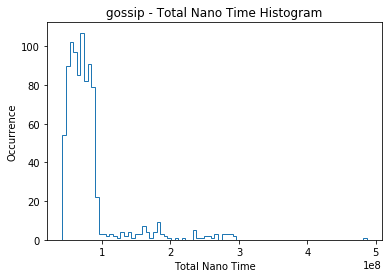

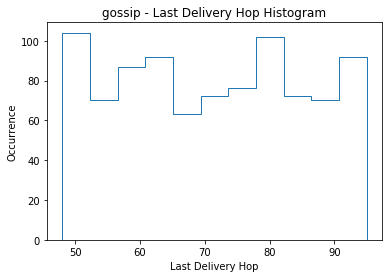

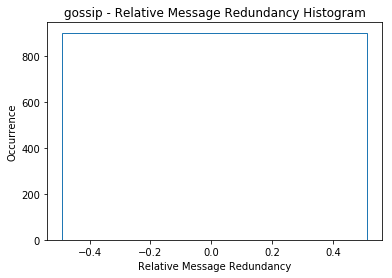

Messages published: 900
Total Nano Times - mean: 79252243.75555556, median: 69439046.0, std: 44002364.76085601
Last Delivery Hop - mean: 71.17111111111112, median: 71.0, std: 13.983309451266411
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_5a.2.json


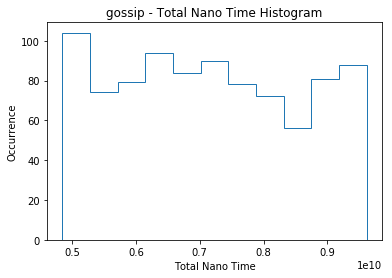

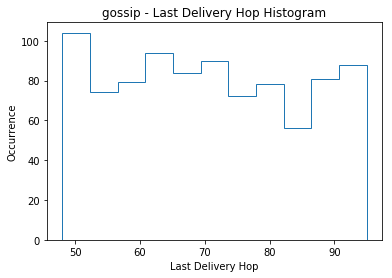

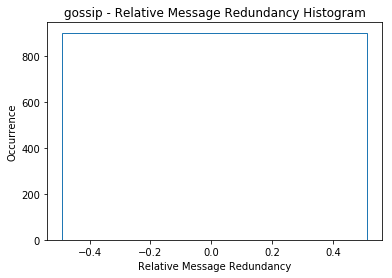

Messages published: 900
Total Nano Times - mean: 7145435997.941112, median: 7078607415.5, std: 1400171905.9748416
Last Delivery Hop - mean: 70.7088888888889, median: 70.0, std: 13.859522554262062
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_21a.3.json


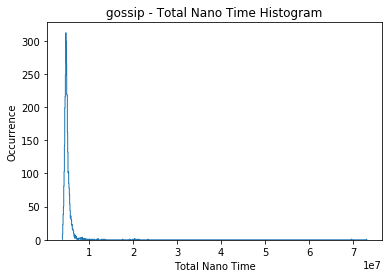

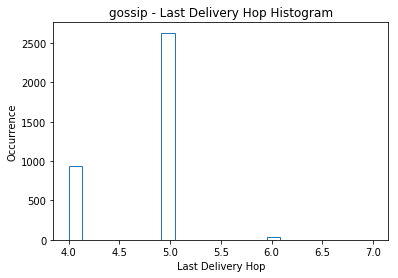

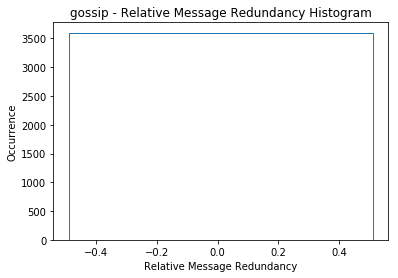

Messages published: 3600
Total Nano Times - mean: 5076683.323888889, median: 4853494.0, std: 1886812.9711311194
Last Delivery Hop - mean: 4.751111111111111, median: 5.0, std: 0.4567383020321482
Relative Message Redundancy - mean: 0.010638355999999996, median: 0.010638356, std: 3.469446951953614e-18


file:analysis_4b.1.json


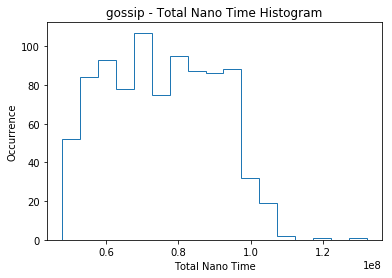

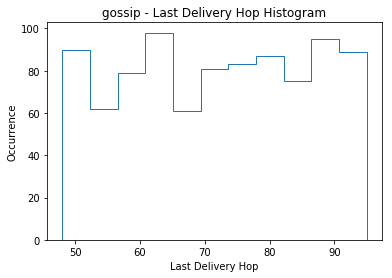

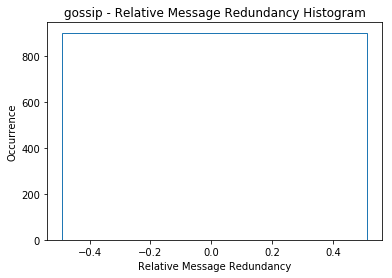

Messages published: 900
Total Nano Times - mean: 75423898.66333333, median: 75638990.0, std: 14899471.052595941
Last Delivery Hop - mean: 72.00333333333333, median: 72.0, std: 13.76367965980674
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_bw_10MBps.json


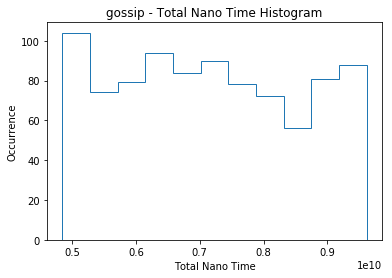

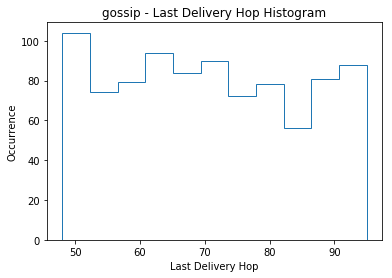

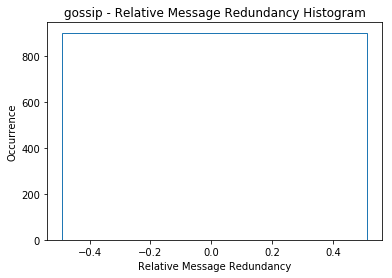

Messages published: 900
Total Nano Times - mean: 7145435997.941112, median: 7078607415.5, std: 1400171905.9748416
Last Delivery Hop - mean: 70.7088888888889, median: 70.0, std: 13.859522554262062
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_4c.2.json


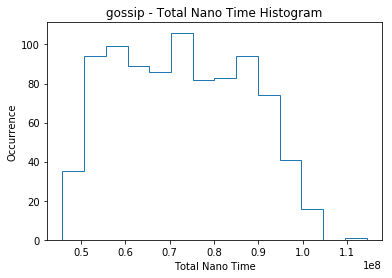

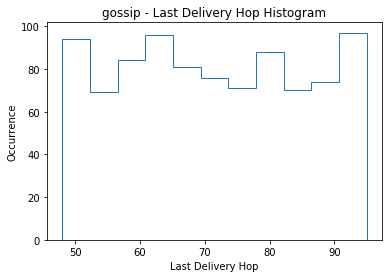

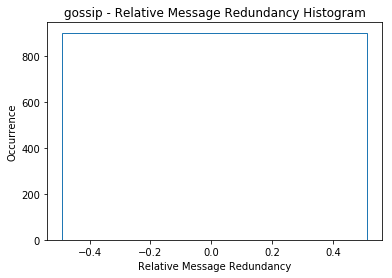

Messages published: 900
Total Nano Times - mean: 72852876.36666666, median: 72006577.5, std: 14419052.667984128
Last Delivery Hop - mean: 71.42333333333333, median: 71.0, std: 13.841632450288836
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_2b.3.json


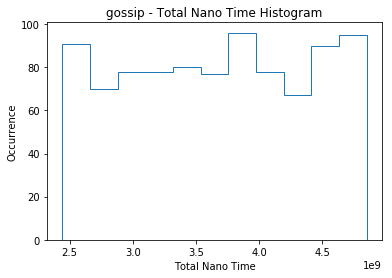

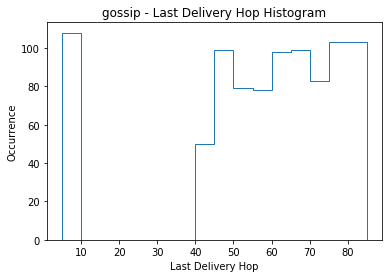

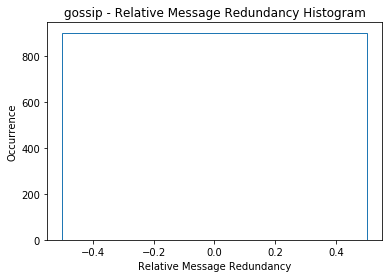

Messages published: 900
Total Nano Times - mean: 3666945658.8, median: 3676859358.5, std: 706966871.4977198
Last Delivery Hop - mean: 56.75333333333333, median: 61.0, std: 21.869594316208875
Relative Message Redundancy - mean: 1.0000000000000002e-06, median: 1e-06, std: 2.117582368135751e-22


file:analysis_2c.3.json


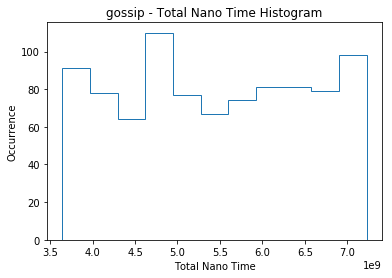

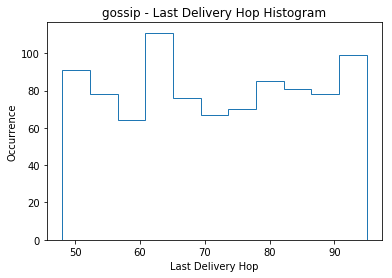

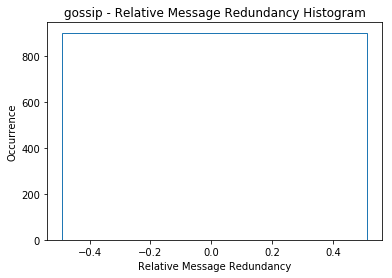

Messages published: 900
Total Nano Times - mean: 5443866738.497778, median: 5395792100.0, std: 1061337923.3799767
Last Delivery Hop - mean: 71.64111111111112, median: 71.0, std: 13.966908466040916
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_21c.3.json


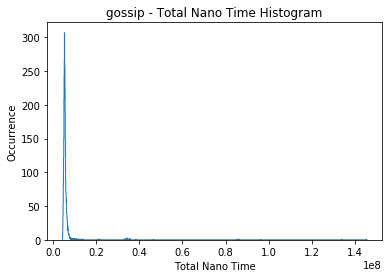

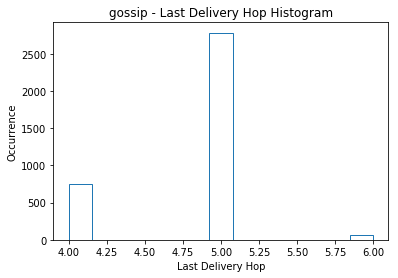

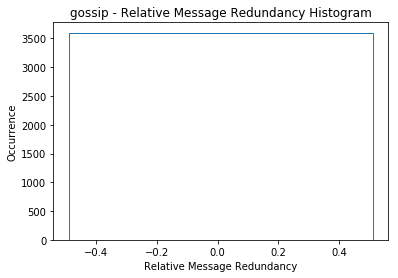

Messages published: 3600
Total Nano Times - mean: 5769986.860277778, median: 5304439.5, std: 4793747.842950463
Last Delivery Hop - mean: 4.811111111111111, median: 5.0, std: 0.4370213430954919
Relative Message Redundancy - mean: 0.010638355999999996, median: 0.010638356, std: 3.469446951953614e-18


file:analysis_2c.1.json


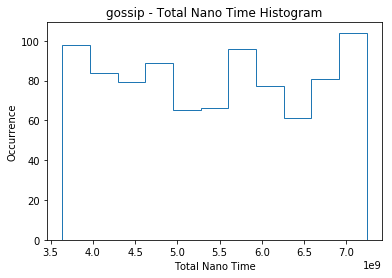

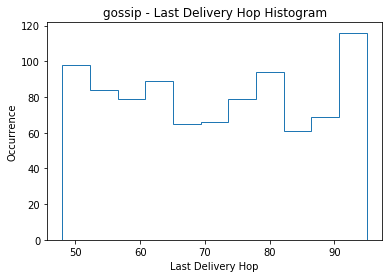

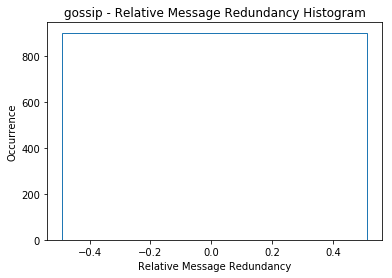

Messages published: 900
Total Nano Times - mean: 5431782918.682222, median: 5464839187.5, std: 1091707119.6092129
Last Delivery Hop - mean: 71.51, median: 72.0, std: 14.373622059561436
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_2a.1.json


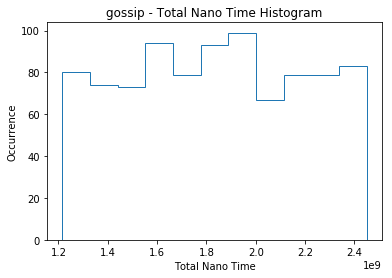

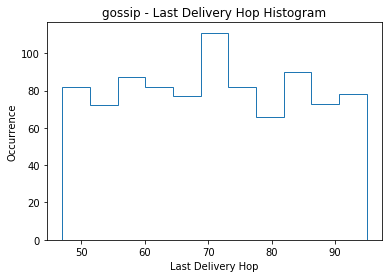

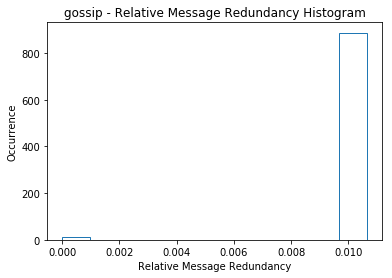

Messages published: 900
Total Nano Times - mean: 1835776836.3166666, median: 1820604739.0, std: 351100644.3619234
Last Delivery Hop - mean: 70.83777777777777, median: 70.0, std: 13.57474434199839
Relative Message Redundancy - mean: 0.010484705302222222, median: 0.010638356, std: 0.0012691842399679537


file:analysis_1c.3.json


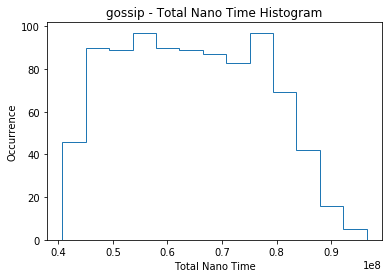

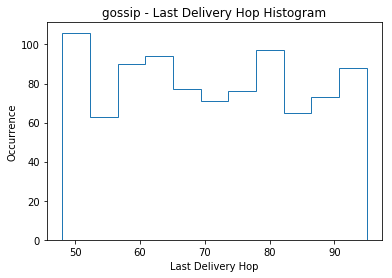

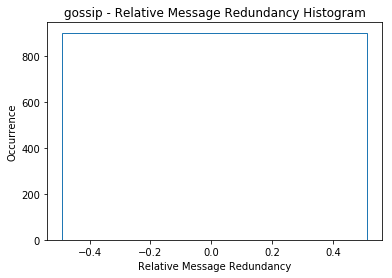

Messages published: 900
Total Nano Times - mean: 64384966.05888889, median: 63805211.5, std: 12825612.354780065
Last Delivery Hop - mean: 70.89777777777778, median: 70.0, std: 13.831630238758134
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_5a.3.json


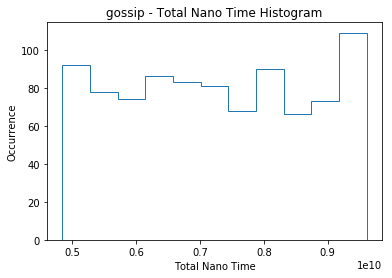

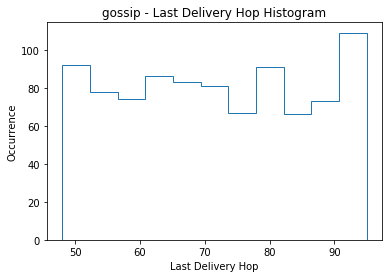

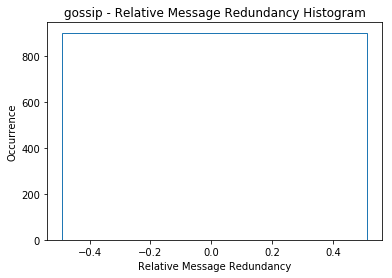

Messages published: 900
Total Nano Times - mean: 7248325338.33, median: 7177348225.5, std: 1418782182.0362487
Last Delivery Hop - mean: 71.71555555555555, median: 71.0, std: 14.040622897792844
Relative Message Redundancy - mean: 0.0105262995, median: 0.0105262995, std: 0.0


file:analysis_21c.2.json


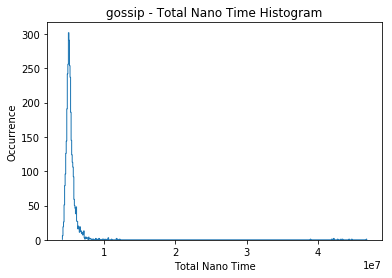

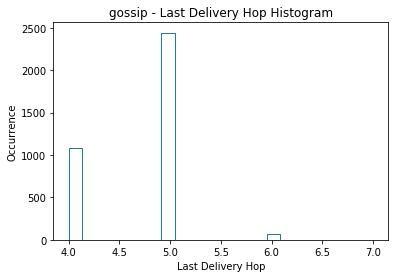

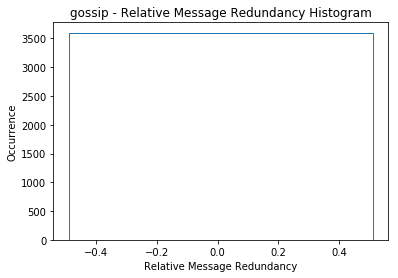

Messages published: 3600
Total Nano Times - mean: 5406761.525277778, median: 5160897.5, std: 2190265.198235493
Last Delivery Hop - mean: 4.7186111111111115, median: 5.0, std: 0.49327506850628133
Relative Message Redundancy - mean: 0.010638355999999996, median: 0.010638356, std: 3.469446951953614e-18


file:analysis_series.json


TypeError: 'NoneType' object is not iterable

In [6]:
for file in glob.glob('analysis*.json'):
    try: 
        print("\n\nfile:" + file)
        computeMetrics('gossip', file)
    except KeyError:
        #not sure why this is happening
        print("relativeMessageRedundancy key error, skipping analysis")